# **Project 2: Investing in Stocks - Part 2**

* Group Number : BDM 14 7
* Group Members : Beata Labunko; Weilin Luo; Chetna Rajabhoj; Mei-Yu Liao

#  **Introduction**

The goal of our project is to select 10 stocks from the Consumer Staples stocks and create an investment plan for potential investors based on these stocks. Consumer Staples stocks represent companies manufacturing and marketing products that we use in our everyday lives, including cleaning and personal hygiene products, paper goods, cosmetics, packaged food, and beverages, as well as alcohol and tobacco. These kinds of goods are often necessities that are used by people regardless of the current state of the economy. Even though these stocks might not have the highest earnings growth year-over-year, they usually have modest growth and provide safe and reliable profits. Therefore, we believe that investing in these stocks is a quite good strategy, and in this project, we are aiming at creating a portfolio out of the best-performing Consumer Staples stocks.
![picture](https://learn.stash.com/wp-content/uploads/2018/08/1100x450__-consumerstaples.jpg)


# **1. Explore Data**

## 1.1 Importing Modules, Mounting Google Drive, and Reading Data

In [53]:
# We are setting up the environment by importing the necessary Python modules:
import pandas as pd # We are importing Pandas module useful for data analysis
import numpy as np # We are importing Numpy module for numeric functions
import matplotlib.pyplot as plt # We are importing Pylot, Matplotlib module that will allow me to create plots
import plotly.graph_objects as go # This allows us to create candlestick chart
# library required to import input excel file.
from google.colab import files

In [54]:
# We are mounting the Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# We are reading our data for the Consumer Staples stocks retrieved from 
# Barchart:https://www.barchart.com/stocks/indices/sp-sector/consumer-staples. 
# We combined the data for Main, Technical, Performance and Fundamental views into one file.
# We also added industry category for each stock. We categorized stocks into Food Processing, Beverage, Consumer Goods, Retail and Tobacco.
# On the lefthand side, please navigate to your data and copy and paste the path:
df = pd.read_excel('/content/drive/MyDrive/consumer staples raw data.xlsm')

In [56]:
# Upload the input file.
# uploaded = files.upload()

In [57]:
# Reading data from Excel file and transforming into a Pandas dataframe:
# df = pd.read_excel('consumer staples raw data.xlsm') 

## 1.2 Initial Data Exploration

Check if there are any missing values, wrong data types, or strange values.

In [58]:
# We are looking at the first 5 rows:
df.head()

,Symbol,Name,Industry,Last,Change,%Chg,Open,High,Low,Volume,Time,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,ADM,Archer Daniels Midland,Food Processing,46.24,-3.68,-0.0737,48.00,49.58,45.68,6630100,2020-10-30,64% Buy,0.4268,0.3460,3121355,28.92,52.05,11.66,-0.0024,-0.0054,0.0664,0.1409,27737896000,13.46,3.68,1379000000,0.90,1.44,0.0288
1,BF.B,Brown Forman Inc Cl B,Beverage,69.71,0.09,0.0013,69.28,70.43,68.90,1199700,2020-10-30,24% Buy,0.3347,0.1988,740995,44.68,83.40,8.08,0.0312,-0.0745,0.0072,0.0743,33309760000,40.02,1.74,827000000,0.72,0.70,0.0100
2,CAG,Conagra Brands Inc,Food Processing,35.09,-0.41,-0.0115,35.02,35.35,34.72,2715400,2020-10-30,24% Buy,0.3965,0.1824,2398350,22.83,39.34,20.04,0.0248,-0.0174,-0.0610,0.2627,17342388000,14.06,2.55,840100000,0.86,0.85,0.0239
3,CHD,Church & Dwight Company,Consumer goods,88.39,1.33,0.0153,87.18,88.96,86.62,1961400,2020-10-30,24% Buy,0.4148,0.2304,1526440,47.98,98.96,29.98,0.2566,-0.0568,-0.0185,0.1721,21530982000,31.40,2.81,615900000,0.39,0.96,0.0110
4,CL,Colgate-Palmolive Company,Consumer goods,78.89,2.22,0.0290,79.94,81.09,77.68,7363500,2020-10-30,72% Buy,0.5288,0.1857,3179735,58.49,81.09,18.68,0.1460,0.0226,0.0263,0.1503,65736860000,26.23,2.93,2367000000,0.59,1.76,0.0230


In [59]:
# We are checking the number of rows and columns in our data:
df.shape

(32, 29)

In [60]:
# We are checking the data types and complete values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Symbol         32 non-null     object        
 1   Name           32 non-null     object        
 2   Industry       32 non-null     object        
 3   Last           32 non-null     float64       
 4   Change         32 non-null     float64       
 5   %Chg           32 non-null     float64       
 6   Open           32 non-null     float64       
 7   High           32 non-null     float64       
 8   Low            32 non-null     float64       
 9   Volume         32 non-null     int64         
 10  Time           32 non-null     datetime64[ns]
 11  Opinion        32 non-null     object        
 12  20D Rel Str    32 non-null     float64       
 13  20D His Vol    32 non-null     float64       
 14  20D Avg Vol    32 non-null     int64         
 15  52W Low        32 non-nul

In [61]:
# We are checking for missing values in the entire dataframe:
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum().sum()
# Looks like we have a clean dataset!

0

## 1.3 Relative Strength Index

From researches, we discovered that RSI is an important index that can help us see if it’s going to be a bullish or bearish trend of stock with thresholds 0.33 and 0.66. [1]

In [62]:
# The Relative Strength is an index that can show if it is a good stock or not. 
# We might want to avoid selecting companies that have RSI lower than 0.33. 
df[df['20D Rel Str']<0.33]
# KMB, MO, and STZ are 3 companies that we might want to avoid in our selection.

,Symbol,Name,Industry,Last,Change,%Chg,Open,High,Low,Volume,Time,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
14,KMB,Kimberly-Clark Corp,Consumer goods,132.59,-0.24,-0.0018,133.63,134.56,131.05,2140000,2020-10-30,24% Sell,0.2677,0.2801,1974100,110.66,160.16,-4.25,-0.0361,-0.1021,-0.1275,-0.0081,45180396000,17.14,7.76,2157000000,0.50,4.28,0.0322
21,MO,Altria Group,Tobacco,36.08,-0.79,-0.0214,36.25,36.75,35.83,12786600,2020-10-30,88% Sell,0.3070,0.2206,7485780,30.95,51.78,-24.17,-0.2771,-0.0663,-0.1323,-0.2150,68519096000,8.58,4.28,-1293000000,0.51,3.44,0.0933
26,STZ,Constellation Brands Inc,Beverage,165.23,-0.62,-0.0037,164.79,165.24,160.63,1549100,2020-10-30,24% Sell,0.3167,0.2146,965170,104.28,208.55,-10.59,-0.1292,-0.1281,-0.0863,-0.1374,32141732000,17.82,9.26,-11800000,1.75,3.00,0.0181


## 1.4 Plots

### **Chart #1**
- We are creating a chart to display market value by industry type (Food Processing, Beverage, Consumer Goods, Retail, and Tobacco).
- Here we can see that WMT, COST, PG, PEP, KO are doing good.

In [63]:
# Chart 1
import plotly.express as px 
   
fig = px.bar(df, x="Symbol", y="Market Cap", 
             color="Industry", hover_data=['Symbol'], 
             barmode = 'group',
             labels={"Symbol":"Company"},title="Market Value by Industry") 

fig.show()

### **Chart #2**
- We look at the P/E ratio, which is the price to earnings ratio. The lower the ratio, the better [2].
- P/E ratio changes day to day because of stock price changes on daily basis. From data we downloaded on Oct 30th, 2020, EL has the highest P/E ratio among all stocks.

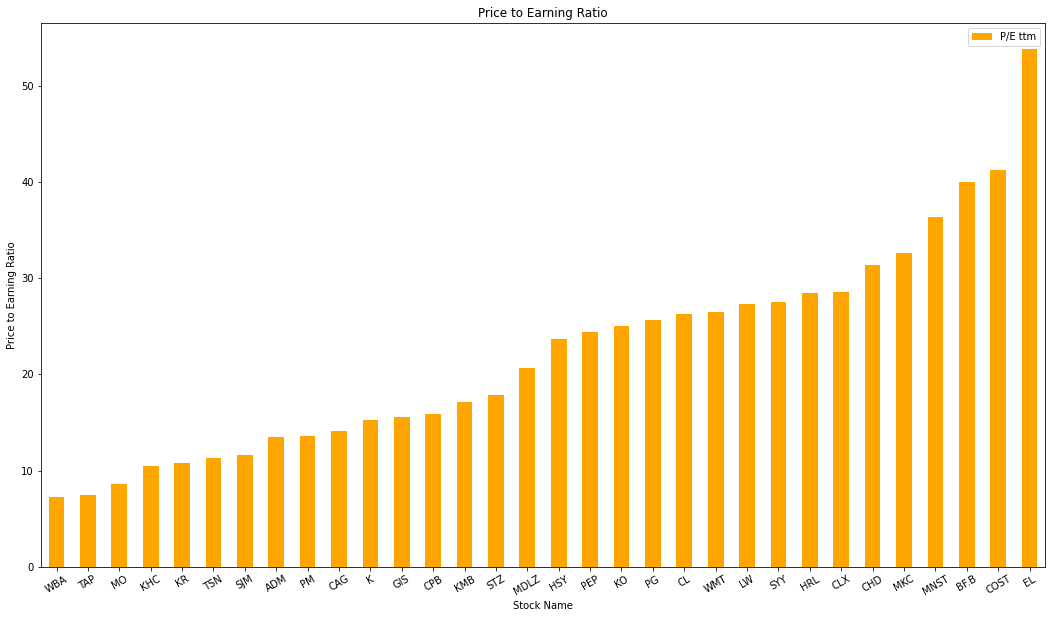

In [64]:
# Chart 2
df.sort_values('P/E ttm',inplace=True)
df.plot.bar(x = 'Symbol', y = ['P/E ttm'],figsize=(18,10),color='orange')
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Price to Earning Ratio')
plt.xlabel('Stock Name')
plt.title('Price to Earning Ratio')
plt.show()

### **Chart #3**
- We also look at the net income for each company.
- We can see that WMT has the highest net incoming among all 32 stocks.
- We can see that MO and STZ again are not doing so well since they are having either net loss or small income compared with other companies.

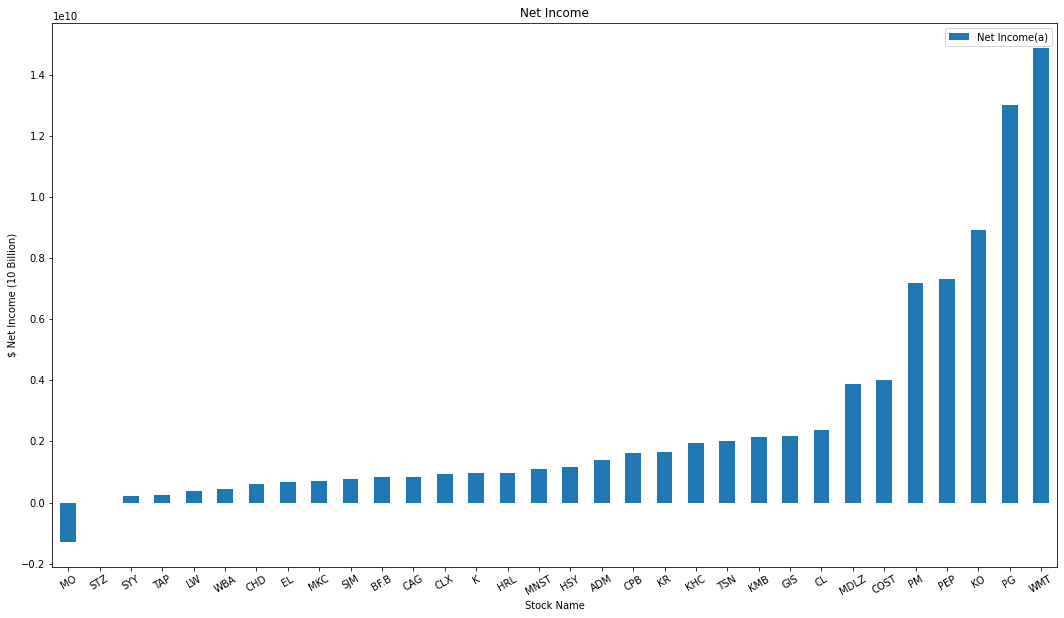

In [65]:
# Chart 3 
df.sort_values('Net Income(a)',inplace=True)
df.plot.bar(x = 'Symbol', y = ['Net Income(a)'],figsize=(18,10))
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('$ Net Income (10 Billion)')
plt.xlabel('Stock Name')
plt.title('Net Income')
plt.show()

### **Chart #4**
- Weighted Alpha is a weighted measurement of stock performance, and it should be positive to show a bullish trend. [3]
- From the chart, we can see that the stocks on the left side of the graph (WBA, TAP, ..., CPB) have negative Alpha, which means that these companies are not doing too well.

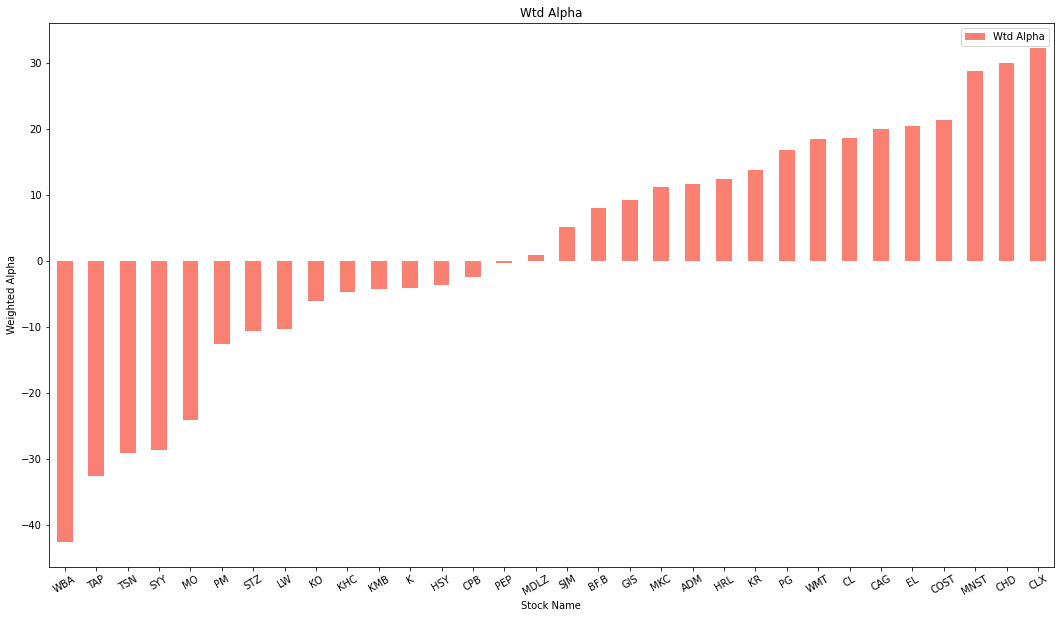

In [66]:
# Chart 4
df.sort_values('Wtd Alpha',inplace=True)
df.plot.bar(x = 'Symbol', y = ['Wtd Alpha'],figsize=(18,10),color='salmon')
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Weighted Alpha')
plt.xlabel('Stock Name')
plt.title('Wtd Alpha')
plt.show()

### **Chart #5**
- We are looking at the dividend yield for each company.
- The companies that can pay steady dividends over time which means they are in a good financial position, so investors prefer the stocks with Dividends pay. [2]
- Here we can see 30 out of 32 stocks paid the dividend in the last term.

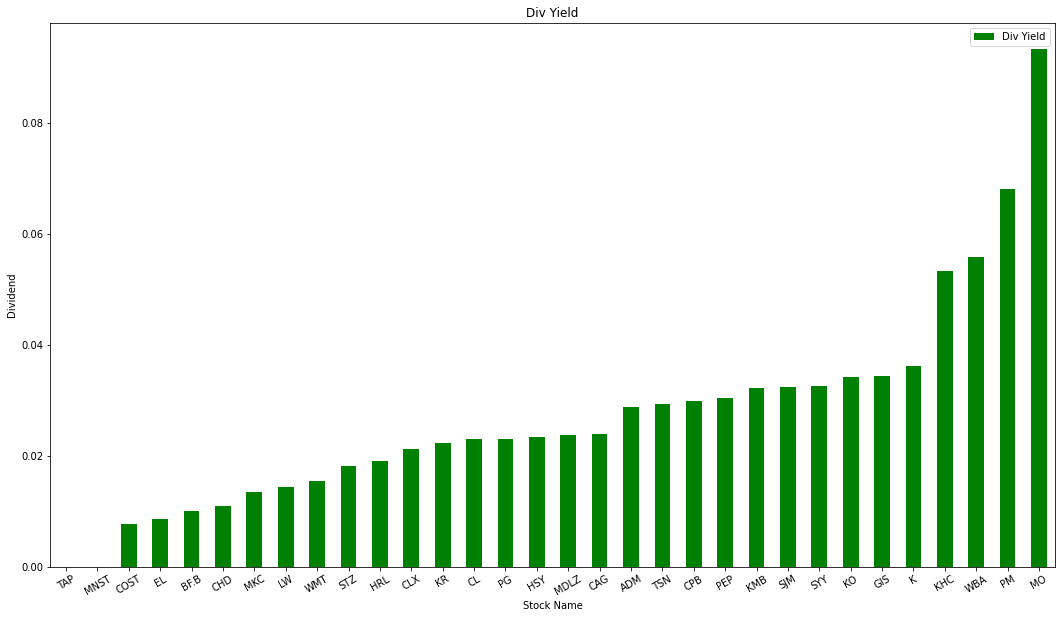

In [67]:
# Chart 5
df.sort_values('Div Yield',inplace=True)
df.plot.bar(x ='Symbol', y='Div Yield', figsize=(18,10), color='green')
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Dividend')
plt.xlabel('Stock Name')
plt.title('Div Yield')
plt.show()

### **Chart #6**
- Now we look at their volumes.
- Investors prefer a higher average daily trading volume. The stock is usually less volatile when it has a higher average daily trading volume. [4]
- We can see that trading volume on October 30th, 2020 is higher than 20 days average trading volume for most stocks in the Consumer Staples stocks.

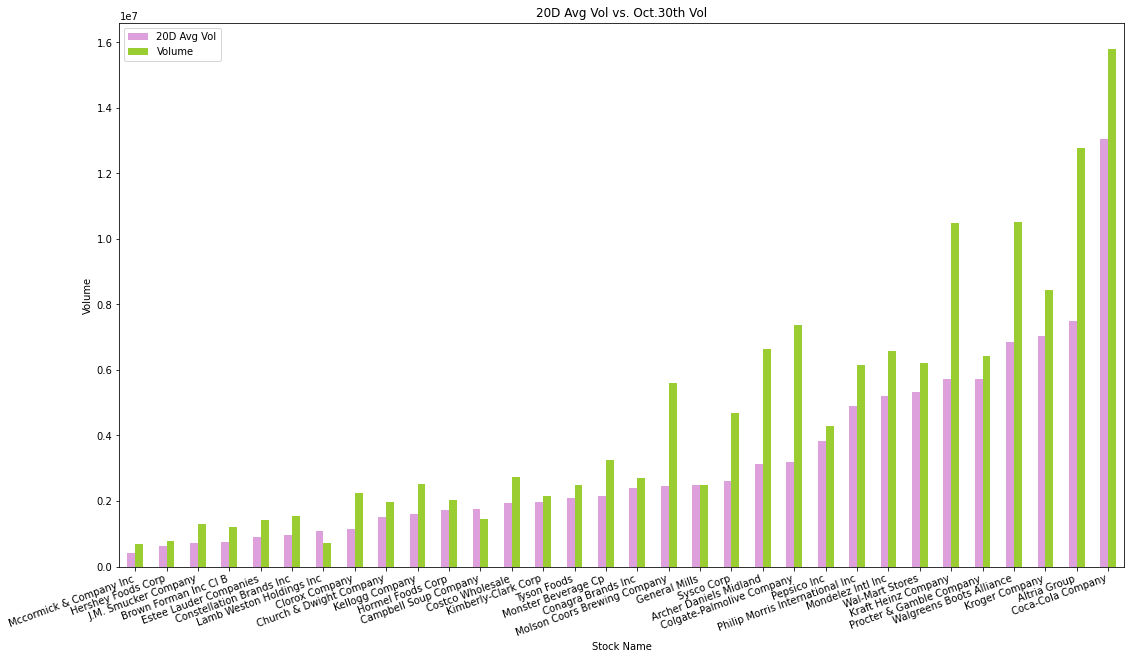

In [68]:
# Chart 6
df.sort_values('20D Avg Vol',inplace=True)
df.plot.bar(x = 'Name', y = ['20D Avg Vol', 'Volume'],figsize=(18,10),color=['plum','yellowgreen'])
plt.ylabel('Volume')
plt.xticks(rotation=20, horizontalalignment="right")
plt.xlabel('Stock Name')
plt.title('20D Avg Vol vs. Oct.30th Vol')
plt.show()

### **Chart #7**
- We are examining how the stock's price changes over 1 month, 3 months, and 52 weeks.
- Overall, 52 weeks change is more volatile. CLX, KR, and MNST have a positive change of over 30% in the past 52 weeks. On the other hand, SYY, TAP, TSN, and WBA have a negative change of over 30%.
- Changes over 1M and 3M are much less volatile than 52W.

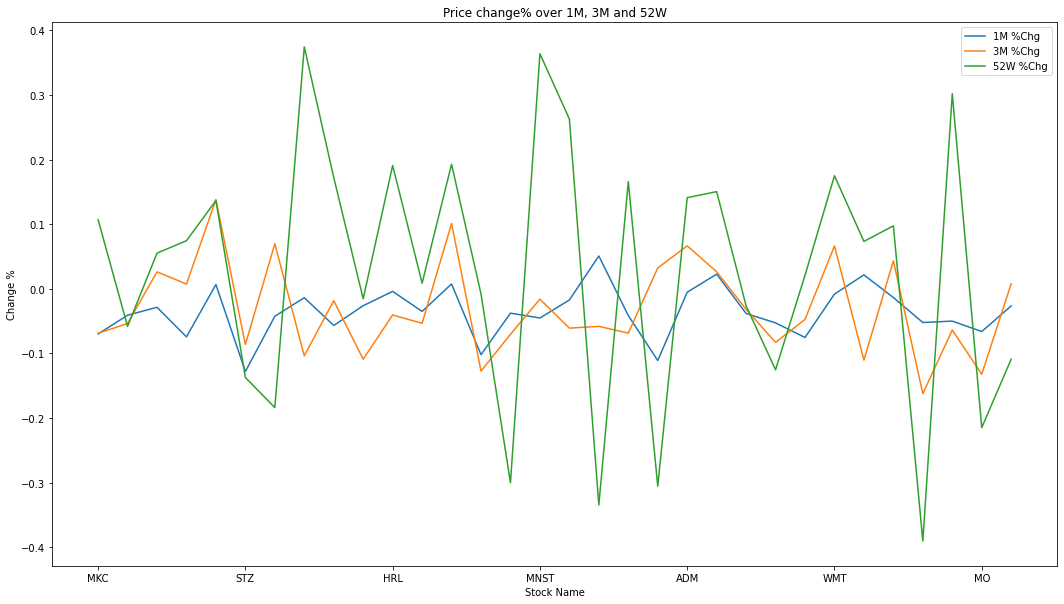

In [69]:
# Chart 7
df.plot(x ='Symbol', y=['1M %Chg','3M %Chg','52W %Chg'], kind = 'line',figsize=(18,10))
plt.ylabel('Change %')
plt.xlabel('Stock Name')
plt.title('Price change% over 1M, 3M and 52W')
plt.show()

### **Chart #8**
- This Chart tells us the price range between the highest and lowest price in the past 52 weeks, as well as the price of Oct 30th, 2020.
- Stocks in red candlestick had a negative change for Oct 30th, 2020. On the other hand, stocks in green had a positive change for Oct 30th, 2020.


In [70]:
# Chart 8
fig = go.Figure(data=[go.Candlestick(x=df['Name'],
                       open=df['Open'], high=df['52W High'],
                       low=df['52W Low'], close=df['Last'])])

fig.show()

## 1.5 Pre-Selection of Best Performing Stocks
- We decided to look at the stocks that have the up-trend, as well as RSI bigger than 0.33 and smaller than 0.66, which will show a long-run strength (recommended). [1]
- Based on this methodology, 11 stocks are selected: MKC, SJM, BF.C, CHD, COST, MNST, ADM, CL, PEP, MDLZ, WMT, PG.

In [71]:
trend=df[(df['1M %Chg']<df['3M %Chg'])&(df['3M %Chg']<df['52W %Chg'])&(0.33<df['20D Rel Str'])]
trend.reset_index(drop=True)

,Symbol,Name,Industry,Last,Change,%Chg,Open,High,Low,Volume,Time,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,MKC,Mccormick & Company Inc,Food Processing,180.51,-3.39,-0.0184,183.10,184.31,178.51,687800,2020-10-30,8% Buy,0.3439,0.2058,407120,112.22,211.07,11.31,0.0635,-0.0700,-0.0688,0.1070,24534468000,32.63,5.69,702700000,0.43,2.48,0.0135
1,SJM,J.M. Smucker Company,Food Processing,112.20,0.92,0.0083,111.06,113.10,110.75,1301200,2020-10-30,40% Buy,0.4383,0.1520,712935,91.88,125.62,5.20,0.0775,-0.0287,0.0261,0.0551,12694154000,11.65,9.55,779500000,0.24,3.60,0.0324
2,BF.B,Brown Forman Inc Cl B,Beverage,69.71,0.09,0.0013,69.28,70.43,68.90,1199700,2020-10-30,24% Buy,0.3347,0.1988,740995,44.68,83.40,8.08,0.0312,-0.0745,0.0072,0.0743,33309760000,40.02,1.74,827000000,0.72,0.70,0.0100
3,CHD,Church & Dwight Company,Consumer goods,88.39,1.33,0.0153,87.18,88.96,86.62,1961400,2020-10-30,24% Buy,0.4148,0.2304,1526440,47.98,98.96,29.98,0.2566,-0.0568,-0.0185,0.1721,21530982000,31.40,2.81,615900000,0.39,0.96,0.0110
4,COST,Costco Wholesale,Retail,357.62,-7.24,-0.0198,361.13,363.85,355.79,2724900,2020-10-30,80% Buy,0.4745,0.1766,1939125,271.28,384.87,21.45,0.2167,0.0074,0.1010,0.1927,160986000000,41.24,8.85,4002000000,0.69,2.80,0.0077
5,MNST,Monster Beverage Cp,Beverage,76.57,-0.97,-0.0125,76.83,77.22,75.45,3256000,2020-10-30,24% Buy,0.4140,0.2370,2150450,50.06,87.05,28.90,0.2049,-0.0453,-0.0161,0.3637,40894284000,36.32,2.13,1107840000,1.04,0.00,0.0000
6,ADM,Archer Daniels Midland,Food Processing,46.24,-3.68,-0.0737,48.00,49.58,45.68,6630100,2020-10-30,64% Buy,0.4268,0.3460,3121355,28.92,52.05,11.66,-0.0024,-0.0054,0.0664,0.1409,27737896000,13.46,3.68,1379000000,0.90,1.44,0.0288
7,CL,Colgate-Palmolive Company,Consumer goods,78.89,2.22,0.0290,79.94,81.09,77.68,7363500,2020-10-30,72% Buy,0.5288,0.1857,3179735,58.49,81.09,18.68,0.1460,0.0226,0.0263,0.1503,65736860000,26.23,2.93,2367000000,0.59,1.76,0.0230
8,PEP,Pepsico Inc,Beverage,133.29,-0.70,-0.0052,132.93,133.84,131.71,4303900,2020-10-30,16% Buy,0.4118,0.1938,3846785,101.42,147.20,-0.34,-0.0247,-0.0383,-0.0320,-0.0264,185168000000,24.39,5.50,7314000000,0.57,4.09,0.0305
9,MDLZ,Mondelez Intl Inc,Food Processing,53.12,-0.07,-0.0013,53.03,53.51,52.56,6574100,2020-10-30,8% Sell,0.3413,0.1937,5214315,41.19,59.96,0.91,-0.0356,-0.0754,-0.0475,0.0209,75973296000,20.68,2.57,3870000000,0.61,1.26,0.0237


## 1.6 Qualitative Research
In addition to conducting the EDA of the Consumer Staples stock, we did some background research on our stock's companies, products that they sell, as well as the controversies that they are involved in. This allowed us for a more thorough examination of the potential stocks that we could invest in.

In [72]:
# We are reading our table including our background researches.
# On the left-hand side, please navigate to your data and copy and paste the path:
df = pd.read_excel('/content/drive/MyDrive/s&p consumer staples_stocks description.xlsx')

In [73]:
# We are displaying our table here:
df.head(n=32) 

,Selected,Symbol,Name,Ownership,Industry,Industry Category,Description,Controversies
0,Yes,ADM,Archer Daniels Midland,"American; headquarter in Chicago, Illinnois","Food processing, commodities",Food processing,"Worldwide processing of soybean, corn, wheat, ...","Many, including Sherman Antitrust Violation in..."
1,Yes,BF.B,Brown Forman Inc Cl B,"American; headquarter in Lousiville, Kentucky",Alcoholic drink,Beverage,"Production of spirits such as Jack Daniel's, E...",Bribery accusations in China in 2011
2,No,CAG,Conagra Brands Inc,"American; headquarter in Chicago, Illinnois",Food processing,Food processing,Production of food products under various name...,Environmental issues accussations in 2006 (lac...
3,Yes,CHD,Church & Dwight Company,"American; headquarter in Ewing, New Jersey","Dental, medical",Consumer goods,Production of household products such as Arm &...,NaN
4,Yes,CL,Colgate-Palmolive Company,American; headquartered on Park Avenue in Midt...,Consumer goods,Consumer goods,Production of household and skin care products...,"World top plastic producer in 2019, Total toot..."
5,No,CLX,Clorox Company,"American; headquarter in Oakland, California","Consumer household products, healthcare, food",Consumer goods,Production of household and professional produ...,Allegations of sexists marketing in 2006 and 2...
6,Yes,COST,Costco Wholesale,"American; headquarters are in Issaquah, Washin...",Wholesale,Retail,Multinational corporation which operates a cha...,"Employee rights issues (no unions), purchasing..."
7,No,CPB,Campbell Soup Company,"American; headquarter in Camden, New Jersey",Food processing,Food processing,"Production of food and snacks, such as Campbel...",Health controversies - too much sodium in Camp...
8,No,EL,Estee Lauder Companies,"American; headquarter in Midtown Manhattan, Ne...",Cosmetics,Consumer goods,"Manufacturer and marketer of pretige skincare,...","Supporting SOPA, child labor in 2001, animal t..."
9,No,GIS,General Mills,"American; headquarter in Golden Valley, Minnesota",Food processing,Food processing,Manufacturer and marketer of branded consumer ...,NaN


# **2. Our Stocks Selection and Next Steps**
Based on the above charts (reviewing market cap, net income, weighted Alpha, and RSI), as well as our qualitative research, we selected 10 stocks for our investment plan:
* **Retail**: **Walmart** and **Costco**. Both stocks have high net income, good RSI with bullish trend, and positive Weighted Alpha. Out of all Retail stocks, they both have the highest market cap, with Walmart having the highest market cap out of all stocks. Even though both companies are involved in some controversies, especially with regards to labor laws, the companies recently implemented company-wide changes in their labor practices. 
* **Tobacco**: **No stocks selected**. We decided not to pick any of the tobacco stocks since their weighted Alphas are negative. Besides, both Tobacco companies are involved in numerous controversies and lawsuits.
* **Consumer Goods**: **Procter & Gamble**, **Church & Dwight Company**, and **Colgate-Palmolive Company**. These 3 stocks have positive net income, good RSI with bullish trend, and positive Weighted Alpha. Procter & Gamble has a really high market cap. Church & Dwight Company has a really good reputation and we did not come across any major controversies related to its business. Procter & Gamble and Colgate-Palmolive Company had some controversies in the past, but both companies are actively working to address them.
* **Beverage**: **Pepsico Inc.** and **Brown Forman Inc.** These stocks have high net income, good RSI with bullish trend, and positive Weighted Alpha. Even though Pepsico Inc. is involved in many controversies, we decided to select it based on its performance and high market cap. Brown Forman is performing slightly worse than the other 9 stocks that we picked. However, we believe that investing in a company producing alcoholic beverages is a good strategy as alcohol sales thrive even in the most difficult economic conditions.
* **Food Processing**: **Archer Daniels Midland**, **J.M. Smucker Company**, and **Mondelez Intl Inc**. These stocks have positive net income, good RSI with bullish trend, and positive Weighted Alpha. Mondelrz Intl Inc. has the highest market cap out of all food processing stocks and J.M. Smucker Company has a really good reputation.

After selecting the stocks, our next steps are observing their potential profits, including looking at their EPS (to know if you can earn profit easily), RSI trend (to observe their long-run strength), and YTD (Year to date change). [5]

# **3. Import Libraries**

In [74]:
# We are setting up the environment by importing the necessary Python modules:
import pandas as pd # We are importing Pandas module useful for data analysis
import numpy as np # We are importing Numpy module for numeric functions
import matplotlib.pyplot as plt # We are importing Pylot, Matplotlib module that will allow me to create plots
import seaborn as sns # We are importing seaborn for high-level drawing of attractive and informative statistical graphics
import plotly.express as px # We are importing plotly.express, which is a high-level API for creating figures
import plotly.graph_objects as go
from pylab import *

# We are installing stock-specific packages:
!pip install yahoo_fin
# !pip install requests_html
import yahoo_fin.stock_info as si

# We are installing pyomo:
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

from pyomo.environ import *

# **4. Download Stock Data**

Based on the EDA and qualitative research, we selected the following stocks:
* Retail: Walmart and Costco - 'WMT', 'COST'
* Consumer Goods: Procter & Gamble, Church & Dwight Company, and Colgate-Palmolive Company - 'PG', 'CHD', 'CL'
* Beverage: Pepsico Inc. and Brown Forman Inc. - 'PEP', 'BF-B'
* Food Processing: Archer Daniels Midland, J.M. Smucker Company, and Mondelez Intl Inc. - 'ADM', 'SJM', 'MDLZ'

We are using the Yahoo finance API to download stock data from January 1, 2019, to January 1, 2020.

In [75]:
# We are creating a list of our 10 selected stocks from Barchart:
tickers_list = ['WMT','COST','PG','CHD','CL','PEP','ADM','SJM','MDLZ', 'BF-B']
# Using the Yahoo Finance API, we are retrieving data for our 10 selected stocks from 01-Jan-2019 to 01-Jan-2020:
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2019',end_date='01/01/2020',interval='1d') for ticker in tickers_list}

#if you want to see snapshot of yahoo data, please uncomment below code.
# print(dow_prices[tickers_list[0]])

# We are only selecting the adjusted closing price of our stocks and creating the dataframe with the first stock:
prep_data = pd.DataFrame(dow_prices[tickers_list[0]]['adjclose']).rename(columns = {"adjclose":tickers_list[0]})

# We are combining all the tickers (the rest of the stocks) in the dataframe with prep_data:
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

#If you want to snap of dataframe prep_data, please uncomment below code.
# prep_data

# For each ticker, we are creating return feature.  
# In order to calculate the return, we are using a pct_change.
# pct_change is simply a calculation of a daily percent change in price of the acquired stocks as compared to the previous trading day: 
stock = pd.DataFrame()
for i in tickers_list:
  stock[i] = prep_data[i].pct_change()
# We are dropping the NA records:
stock.dropna(inplace=True)

#uncomment below line, if you want to print the stock percent changes.
# stock

## **Initial Plots**

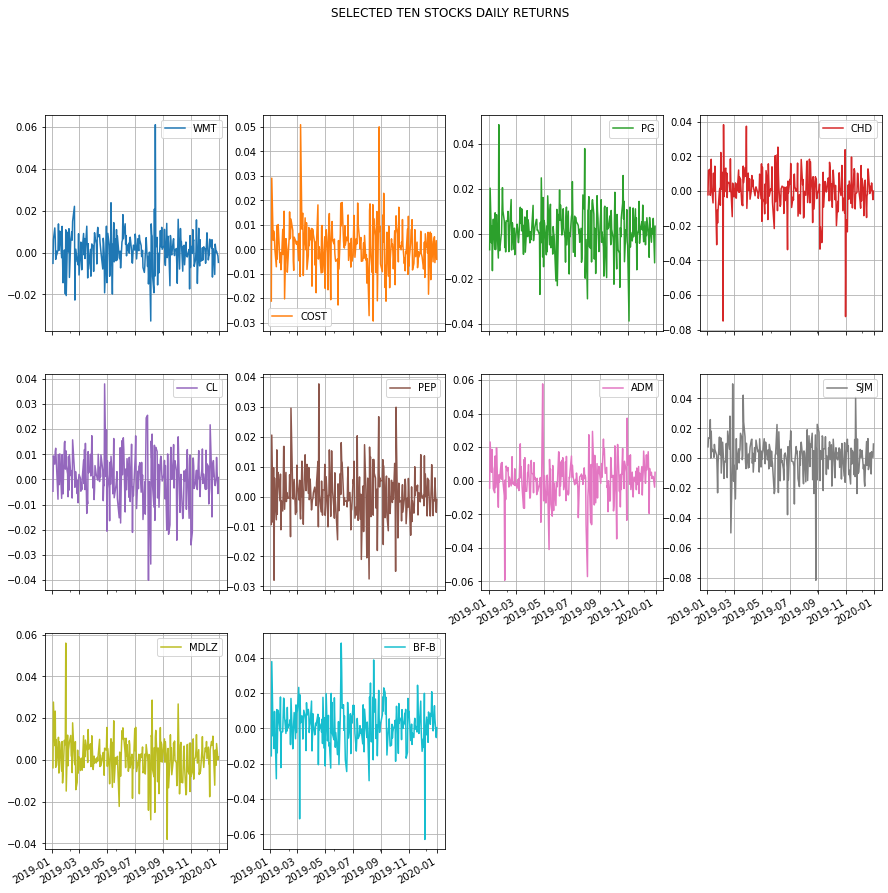

In [76]:
# We are plotting daily returns for our selected stocks:
stock.plot(subplots=True,  grid=True,  layout=(3,4),sharex=True,fontsize=10,figsize=(15,15),title='SELECTED TEN STOCKS DAILY RETURNS')
plt.show()

## **Stock Covariance Matrix**

In [77]:
# We are creating covariance table on stock return dataframe:
stock_cov = stock.cov()
stock_cov

,WMT,COST,PG,CHD,CL,PEP,ADM,SJM,MDLZ,BF-B
WMT,0.000082,0.000045,0.000036,0.000027,0.000030,0.000035,0.000029,0.000012,0.000035,0.000035
COST,0.000045,0.000103,0.000034,0.000029,0.000035,0.000036,0.000030,0.000004,0.000036,0.000042
PG,0.000036,0.000034,0.000108,0.000065,0.000069,0.000052,0.000025,0.000021,0.000052,0.000056
CHD,0.000027,0.000029,0.000065,0.000160,0.000065,0.000043,0.000010,0.000028,0.000042,0.000034
CL,0.000030,0.000035,0.000069,0.000065,0.000102,0.000048,0.000026,0.000036,0.000056,0.000050
PEP,0.000035,0.000036,0.000052,0.000043,0.000048,0.000077,0.000025,0.000029,0.000051,0.000055
ADM,0.000029,0.000030,0.000025,0.000010,0.000026,0.000025,0.000162,0.000020,0.000039,0.000043
SJM,0.000012,0.000004,0.000021,0.000028,0.000036,0.000029,0.000020,0.000174,0.000051,0.000022
MDLZ,0.000035,0.000036,0.000052,0.000042,0.000056,0.000051,0.000039,0.000051,0.000094,0.000050
BF-B,0.000035,0.000042,0.000056,0.000034,0.000050,0.000055,0.000043,0.000022,0.000050,0.000158


## **Stock Average Returns**

In [78]:
# We are creating the average of each stock.
# These are the objective function coefficients
stock_return = stock.mean()
stock_return 

WMT     0.001083
COST    0.001531
PG      0.001414
CHD     0.000482
CL      0.000749
PEP     0.001046
ADM     0.000712
SJM     0.000624
MDLZ    0.001414
BF-B    0.001655
dtype: float64

# **5. Building the Nonlinear Optimization Model (Daily)**


In [79]:
# We are declaring our concrete model:
model = ConcreteModel()

# We are declaring our variables - list of stocks:
model.variables =  Var(tickers_list,within=NonNegativeReals, bounds=(0,1))

# We are setting the objective expression:
obj_expr = 0
for ticker in tickers_list:
  obj_expr += stock_return[ticker]*model.variables[ticker]

model.objective = Objective(expr = obj_expr, sense=maximize)

# We are specifying the constraints:
sum_proportions = 0
for ticker in tickers_list:
    sum_proportions += model.variables[ticker]

model.sum_proportions = Constraint(expr = sum_proportions == 1)

# Uncomment the below line if you want to print the model
# model.pprint() 

In our first attempt, we used the risk levels suggested for the project (0.0001, 0.00031, 0.00001). However, the charts for the optimal stock allocation for different risk levels did not show enough diversity in stock performance. 

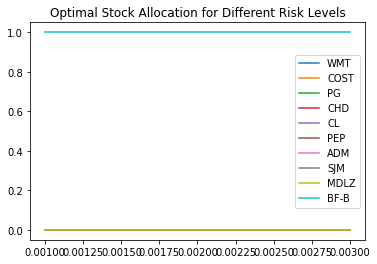






Therefore, subsequently we tried smaller risk levels (0.00001, 0.000315, 0.000015).


In [80]:
# We are creating calculations table for our risks:
def calc_risk():
  # This is a list of all of investment allocations, which are proportions invested in each stock.
  proportions =  [model.variables[ticker] for ticker in tickers_list]
  risk_matrix = [] # This is an empty list initially
  
  # We iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # Since there are 10 stocks, there are 10*10 = 100 elements, and summing these elements at the end is our risk
  for index, col in enumerate(stock_cov.columns):
    i = 0
    risk = []
    for row in stock_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

risk_limits = np.arange(0.00001, 0.000315, 0.000015) # This is the range that we decided to use that gives us best plots
# risk_limits = np.arange(0.0001, 0.00031, 0.00001) # This is suggested risk for project; the chart for optimal stock allocation for different risk levels was not diverse enough
#Uncomment the below line, if you want to print the risk levels.
# risk_limits

In [81]:
# We are updating risk contraints for each limit and then we are solving the problem:
param_analysis = {} # key=risk, value=stock allocations 
returns = {} # key=risk, value=return

for r in risk_limits:
  model.total_risk = Constraint(expr = calc_risk() <= r)
  # We are running the solver:
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(model).write()
  # We are storing our allocation proportions:
  param_analysis[r] = [model.variables[ticker]() for ticker in tickers_list]
  returns[r] = sum([model.variables[ticker]() * stock_return[ticker] for ticker in tickers_list])

    model=unknown;
        message from solver=Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030653715133666992
# -------------------------

## **3.1 Optimal Stock Allocation**

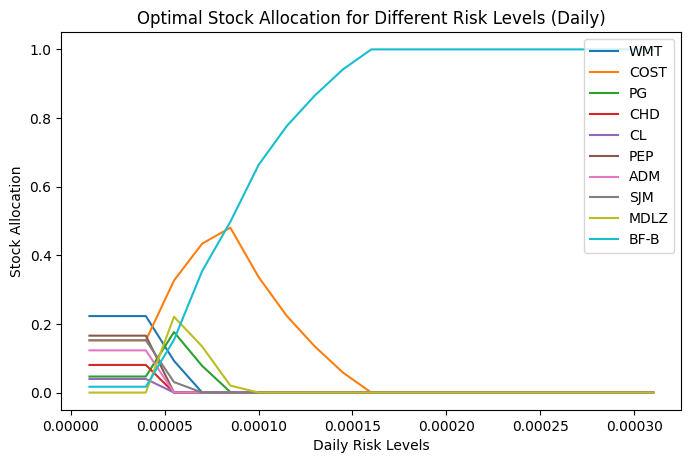

In [82]:
# For each risk limit, we are generating the dataframe for proportions of the portfolio:
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = tickers_list

plt.figure(figsize=(8,5), dpi =100)
sns.lineplot(data = param_analysis, dashes=False)
plt.legend( loc = 'upper right')
# param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels (Daily)')
plt.xlabel("Daily Risk Levels")
plt.ylabel("Stock Allocation")
plt.show() # We are plotting the optimal allocation for different risk levels

## **3.2 Efficient Frontier**
The Efficient Frontier analysis allows us to calculate the curve that plots our portfolio returns against different risk levels so we can evaluate how to maximize the return at different risk levels.

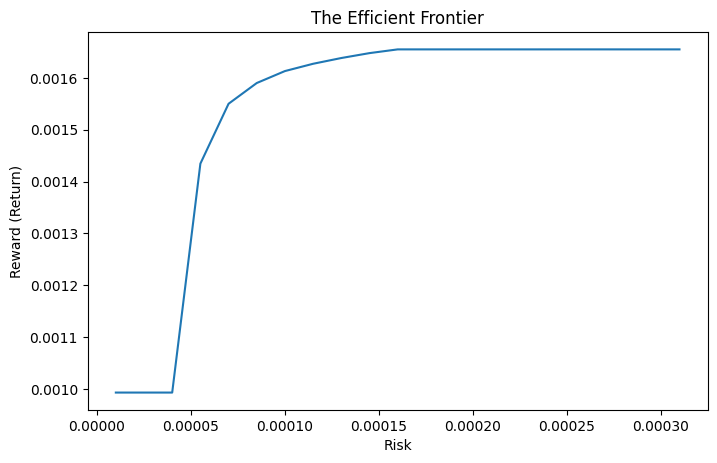

In [83]:
risk = list(returns.keys()) # This forces dict_keys into a list
# print(risk)
reward = list(returns.values()) # This forces dict_values into a list
# print(reward) # Since we cannot name our value 'return'(reserved name), we are calling it a reward
fig, ax = plt.subplots(figsize=(8, 5), dpi = 100)
sns.lineplot(x = risk, y = reward, ax= ax)
# plot(risk, reward, '-.')
ax.set(title ='The Efficient Frontier', xlabel=  'Risk', ylabel = 'Reward (Return)')
plt.show() # We are showing the Efficient Frontier chart

# **6. Analysis-Identifying Risk and Portfolio Allocation**

In [84]:
# Print the proportions of the portfolio for each risk limit in daily model:
param_analysis

,WMT,COST,PG,CHD,CL,PEP,ADM,SJM,MDLZ,BF-B
0.000010,0.222868,0.151962,0.046757,8.047972e-02,0.039690,0.165803,1.229925e-01,1.524722e-01,6.063604e-07,0.016974
0.000025,0.222868,0.151962,0.046756,8.047983e-02,0.039690,0.165802,1.229922e-01,1.524720e-01,1.422670e-06,0.016977
0.000040,0.222868,0.151962,0.046757,8.047967e-02,0.039691,0.165803,1.229925e-01,1.524721e-01,1.164865e-06,0.016974
0.000055,0.092374,0.326437,0.176244,1.803355e-06,0.000002,0.000009,8.695263e-06,3.049498e-02,2.207712e-01,0.153657
0.000070,0.000010,0.434035,0.077634,3.005680e-06,0.000004,0.000007,4.143690e-06,4.384282e-06,1.340469e-01,0.354251
0.000085,0.000008,0.480466,0.001472,2.844800e-06,0.000004,0.000007,3.729369e-06,3.792136e-06,2.029093e-02,0.497742
0.000100,0.000006,0.336818,0.000031,2.544913e-06,0.000003,0.000006,3.263313e-06,3.111390e-06,3.474926e-05,0.663091
0.000115,0.000006,0.223441,0.000023,2.468589e-06,0.000003,0.000005,3.148615e-06,2.953803e-06,2.461918e-05,0.776489
0.000130,0.000006,0.134102,0.000021,2.433949e-06,0.000003,0.000005,3.096925e-06,2.885088e-06,2.214551e-05,0.865832
0.000145,0.000006,0.057946,0.000021,2.418879e-06,0.000003,0.000005,3.072102e-06,2.860580e-06,2.250812e-05,0.941988


In [85]:
# We are showing the returns:
pd.DataFrame.from_dict(returns, orient='index', columns=['Stock Returns'])

,Stock Returns
0.000010,0.000993
0.000025,0.000993
0.000040,0.000993
0.000055,0.001435
0.000070,0.001550
0.000085,0.001590
0.000100,0.001613
0.000115,0.001628
0.000130,0.001639
0.000145,0.001648


Since the Consumer Staples stocks usually have modest and reliable growth, and we are all able to tolerate moderate to a high level of risk, we decided to choose risk = 0.000160 as our selected risk level for our subsequent analysis of monthly portfolio returns (in section 6. Analysis-Identifying Risk and Portfolio Allocation).

In [86]:
r = 0.000160 # This is the highest risk that we want to take for highest return based on our Optimal Stock allocation 
# Let's take a look at our Parameter analysis data and identify allocation proportion according to our risk level:
param_analysis[param_analysis.index==r]

,WMT,COST,PG,CHD,CL,PEP,ADM,SJM,MDLZ,BF-B
0.00016,0.000005,0.000017,0.000012,0.000002,0.000003,0.000004,0.000003,0.000002,0.000012,0.99994


In [87]:
# Using the Yahoo Finance API, we are retrieving data for our 10 selected stocks from 01-Jan-2020 to 31-Oct-2020.
# We are changing interval to 1 month:
dow_prices2 = {ticker : si.get_data(ticker,start_date = '01/01/2020',end_date='10/31/2020',interval='1mo') for ticker in tickers_list}

# print(dow_prices1[tickers_list[0]])

# We are only selecting the adjusted closing price of our stocks and creating the dataframe with the first stock:
prep_data2 = pd.DataFrame(dow_prices2[tickers_list[0]]['adjclose']).rename(columns = {"adjclose":tickers_list[0]})

# We are combining all the tickers (the rest of the stocks) in the dataframe with prep_data:
for i in tickers_list[1:]:
  prep_data2[i] = pd.DataFrame(dow_prices2[i]['adjclose'])

# prep_data2

# create return features for each ticker, 
# we will just use a pct_change as the return
stock2 = pd.DataFrame()
for i in tickers_list:
  stock2[i] = prep_data2[i].pct_change()
 
# drop the na records
stock2.dropna(inplace=True)
stock2

,WMT,COST,PG,CHD,CL,PEP,ADM,SJM,MDLZ,BF-B
2020-02-01,-0.059481,-0.079798,-0.086000,-0.063325,-0.078612,-0.070342,-0.158847,-0.005984,-0.079819,-0.092105
2020-03-01,0.055163,0.016330,-0.028526,-0.073875,-0.017907,-0.090358,-0.058253,0.086509,-0.051515,-0.096076
2020-04-01,0.074528,0.062673,0.071545,0.090527,0.058921,0.108936,0.055713,0.035225,0.033306,0.123682
2020-05-01,0.020650,0.020379,-0.009985,0.072582,0.035571,-0.005594,0.058428,-0.008528,0.013219,0.059968
2020-06-01,-0.030252,-0.017052,0.031487,0.033081,0.012858,0.005397,0.025319,-0.064305,-0.018995,-0.034430
2020-07-01,0.080314,0.073612,0.096596,0.246184,0.053781,0.048908,0.073434,0.033456,0.091484,0.092130
2020-08-01,0.073029,0.070279,0.061645,-0.005190,0.032744,0.017434,0.045062,0.099040,0.052802,0.055235
2020-09-01,0.011777,0.021113,0.004771,-0.019641,-0.026621,-0.010424,0.047143,-0.031191,-0.016604,0.029384
2020-10-01,-0.008291,0.007380,-0.013598,-0.056771,0.022553,-0.031397,-0.005378,-0.028740,-0.070233,-0.072462


In [88]:
# We are generating the return table 
# weights=proportion from above
weights = param_analysis[param_analysis.index==r].values
weighted_returns = (weights * stock2)
weighted_returns.head(10)

,WMT,COST,PG,CHD,CL,PEP,ADM,SJM,MDLZ,BF-B
2020-02-01,-2.750712e-07,-1.362579e-06,-1.017025e-06,-1.381270e-07,-2.237708e-07,-3.032701e-07,-4.337953e-07,-1.490936e-08,-9.353215e-07,-0.092100
2020-03-01,2.551040e-07,2.788460e-07,-3.373465e-07,-1.611392e-07,-5.097387e-08,-3.895662e-07,-1.590835e-07,2.155414e-07,-6.036582e-07,-0.096070
2020-04-01,3.446532e-07,1.070164e-06,8.460917e-07,1.974595e-07,1.677205e-07,4.696625e-07,1.521475e-07,8.776595e-08,3.902797e-07,0.123674
2020-05-01,9.549556e-08,3.479720e-07,-1.180826e-07,1.583174e-07,1.012545e-07,-2.411594e-08,1.595598e-07,-2.124909e-08,1.549052e-07,0.059964
2020-06-01,-1.399021e-07,-2.911682e-07,3.723660e-07,7.215777e-08,3.660008e-08,2.326839e-08,6.914459e-08,-1.602198e-07,-2.225804e-07,-0.034428
2020-07-01,3.714122e-07,1.256954e-06,1.142338e-06,5.369830e-07,1.530896e-07,2.108581e-07,2.005395e-07,8.335812e-08,1.072020e-06,0.092124
2020-08-01,3.377251e-07,1.200028e-06,7.290121e-07,-1.132150e-08,9.320809e-08,7.516498e-08,1.230593e-07,2.467635e-07,6.187401e-07,0.055232
2020-09-01,5.446125e-08,3.605024e-07,5.642396e-08,-4.284239e-08,-7.577847e-08,-4.494176e-08,1.287423e-07,-7.771308e-08,-1.945651e-07,0.029382
2020-10-01,-3.834211e-08,1.260213e-07,-1.608100e-07,-1.238304e-07,6.419927e-08,-1.353616e-07,-1.468548e-08,-7.160647e-08,-8.229903e-07,-0.072458


# **7. Portfolio Monthly and Cumulative Returns**

In [89]:
# Now let's see how our total porfolio return for each month:
por_ret = weighted_returns.sum(axis=1)# axis=1 the rows
por_ret=pd.DataFrame(por_ret, columns= ["Portfolio Monthly Returns(%)"])
por_ret

,Portfolio Monthly Returns(%)
2020-02-01,-0.092105
2020-03-01,-0.096071
2020-04-01,0.123678
2020-05-01,0.059965
2020-06-01,-0.034429
2020-07-01,0.092129
2020-08-01,0.055235
2020-09-01,0.029382
2020-10-01,-0.072459


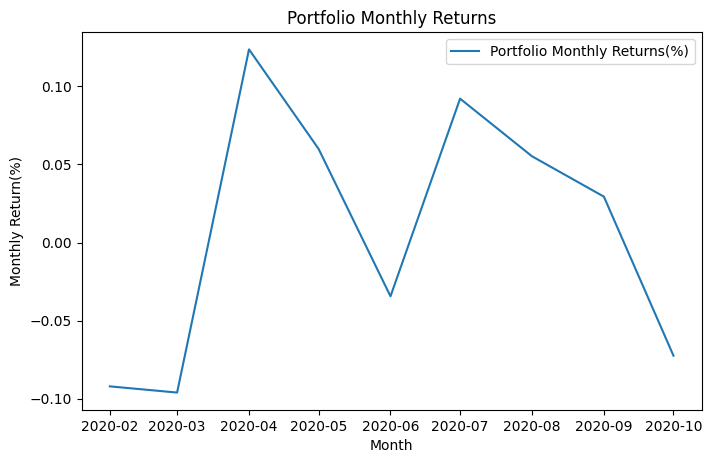

In [90]:
fig, ax = plt.subplots(figsize=(8, 5), dpi = 100)
sns.lineplot(data= por_ret, ax= ax)
ax.set(title ='Portfolio Monthly Returns', xlabel=  'Month', ylabel = 'Monthly Return(%)')
plt.show()

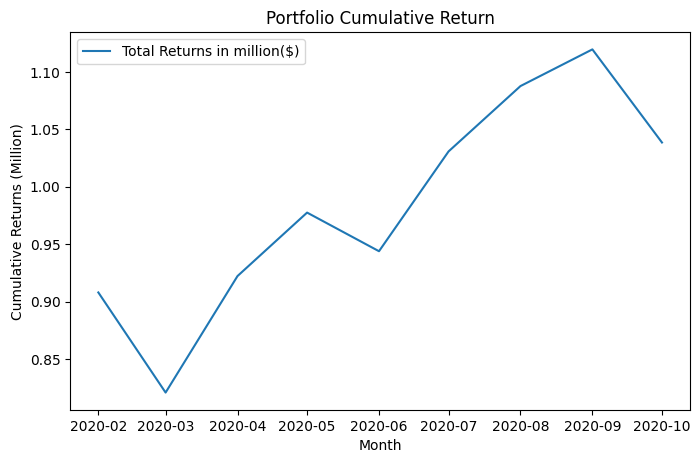

In [91]:
# We are calculating portfolio cumulative returns:
cumulative_ret = (1 + por_ret).cumprod().rename(columns={"Portfolio Monthly Returns(%)": "Total Returns in million($)"})
# cumulative_ret=pd.DataFrame(cumulative_ret).rename(columns={"Portfolio Monthly Returns(%)": "Total Returns in million($)"})

fig, ax = plt.subplots(figsize=(8, 5), dpi = 100)
sns.lineplot(data= cumulative_ret, ax= ax)
ax.set(title ='Portfolio Cumulative Return', xlabel=  'Month', ylabel = 'Cumulative Returns (Million)')
plt.show() 

For 1 million $ invested in January 2020, The Portfolio Returns will be

In [92]:
cumulative_ret

,Total Returns in million($)
2020-02-01,0.907895
2020-03-01,0.820673
2020-04-01,0.922172
2020-05-01,0.977471
2020-06-01,0.943818
2020-07-01,1.030771
2020-08-01,1.087706
2020-09-01,1.119665
2020-10-01,1.038535


# **8. Conclusions**
The Investing in Stocks was a fun, but a little more challenging project than we expected. There are several things that we have learned:
- During model creation, it was necessary to adjust our risk ceilings to get an interesting and diverse stock performance. Our initial model utilizing suggested by the project risk levels did not show enough diversity to conduct a rich analysis.
- We learned that our analyses were quite reliant on the character of our stocks. We struggled to find the right risk ceilings and we thought that we had flaws in our code. However, we realized that our analyses were influenced by the segment of the stock market that we were using. The Consumer Staples stock is considered to be reliable stocks that provide steady profits. They are generally recommended to be included in investments to minimize portfolio risks. Therefore, the risk levels in our Efficient Frontier were in general quite small.
- The Efficient Frontier is a great tool that can be used to optimize the portfolio. It is impossible to build a portfolio without any risks, but the potential returns can balance the portfolio's risks. The Efficient Frontier allows investors to get the best potential returns by analyzing the risks and returns associated with the portfolio so they can adjust investment allocation accordingly.
- Investing in Consumer Staples stock has proven to be a good strategy as these stocks performed quite well during the pandemic. In the initial stages of the pandemic (March-June 2020) the stocks did not bring us a lot of returns. However, from July through October, these stocks performed well. The Covid-19 pandemic brought a significant amount of volatility to the stock market, and we believe that investing in Consumer Staples stocks is a solid approach because of their defensiveness and reliability.
- We learned that there are always better alternative ways to solve the problem in Python. For the final return calculation, we took two different approaches and ended up with the same answer. Both of them are correct, we agreed to keep the better one after we discussed and explained the logic.



# **9. Team Members Contributions**
> No. |	Member Name |	Contribution | Score 
> --- | ---| ---| --- |
1.|	Weilin Luo | EDA - charts creation and descriptions, sections descriptions, provide profound insights, and collab "clean-up"|10/10
2.| Chetana Rajabhoj | extensive work on model coding and analysis, code comments, collab "clean-up"|10/10
3.|	Mei-Yu Liao	| EDA - charts creation and descriptions, extensive work on model coding and analysis, code comments, presentation recording|10/10
4.| Beata Labunko	| data download, qualitative research, code comments adding and clean-up, introduction, conclusions, section descriptions and collab "clean-up"|10/10



# **Appendix**

## **Build the Nonlinear Optimization Model (Monthly)**
We decided to also build our model using the monthly returns. After a meeting with the instructor, we learned that though the risk tolerance and returns became higher in the monthly range, it also lost a lot of accuracies because of ignoring detailed features like the daily model would have. Thus, the monthly model is put in the appendix section as additional material.

In [93]:
# We are creating a list of our 10 selected stocks from Barchart:
tickers_list = ['WMT','COST','PG','CHD','CL','PEP','ADM','SJM','MDLZ', 'BF-B'] 
# Using the Yahoo Finance API, we are retrieving data for our 10 selected stocks from 01-Jan-2020 to 31-Oct-2020.
# We are changing interval to 1 month:
dow_pricesm = {ticker : si.get_data(ticker,start_date = '01/01/2019',end_date='01/01/2020',interval='1mo') for ticker in tickers_list}

# print(dow_prices1[tickers_list[0]])

# We are only selecting the adjusted closing price of our stocks and creating the dataframe with the first stock:
prep_datam = pd.DataFrame(dow_pricesm[tickers_list[0]]['adjclose']).rename(columns = {"adjclose":tickers_list[0]})

# We are combining all the tickers (the rest of the stocks) in the dataframe with prep_data:
for i in tickers_list[1:]:
  prep_datam[i] = pd.DataFrame(dow_pricesm[i]['adjclose'])

# prep_datam

In [94]:
# For each ticker, we are creating return feature.  
# In order to calculate the return, we are using a pct_change (calculation of a percent change in price of the acquired stocks as compared to the previous period):
stockm = pd.DataFrame()
for i in tickers_list:
  stockm[i] = prep_datam[i].pct_change()
# We are dropping the NA records:
stockm.dropna(inplace=True)
stockm

,WMT,COST,PG,CHD,CL,PEP,ADM,SJM,MDLZ,BF-B
2019-02-01,0.032975,0.019149,0.029641,0.018418,0.025274,0.026360,-0.053452,0.009821,0.019456,0.047407
2019-03-01,-0.014749,0.109966,0.055809,0.086344,0.040534,0.068348,0.023303,0.109079,0.058524,0.066478
2019-04-01,0.060118,0.014000,0.023354,0.052225,0.062008,0.044880,0.034083,0.052618,0.023994,0.013061
2019-05-01,-0.013613,-0.024233,-0.026705,-0.007205,-0.037556,-0.000390,-0.140807,-0.008725,0.000000,-0.062113
2019-06-01,0.095001,0.105993,0.065494,-0.015105,0.029445,0.024453,0.073956,-0.046042,0.059980,0.109044
2019-07-01,-0.000996,0.043026,0.076516,0.032576,0.000977,-0.018182,0.006863,-0.034725,-0.002846,-0.008005
2019-08-01,0.035151,0.069405,0.025149,0.057529,0.039594,0.069791,-0.073759,-0.054232,0.032343,0.076263
2019-09-01,0.043797,-0.020399,0.034517,-0.054157,-0.008631,0.002706,0.089544,0.054400,0.001811,0.064248
2019-10-01,0.003539,0.031238,0.001045,-0.070441,-0.066794,0.007425,0.023618,-0.039447,-0.047003,0.046516
2019-11-01,-0.000084,0.011280,-0.013415,0.004289,-0.005107,-0.009769,0.021170,-0.005583,0.001716,0.035104


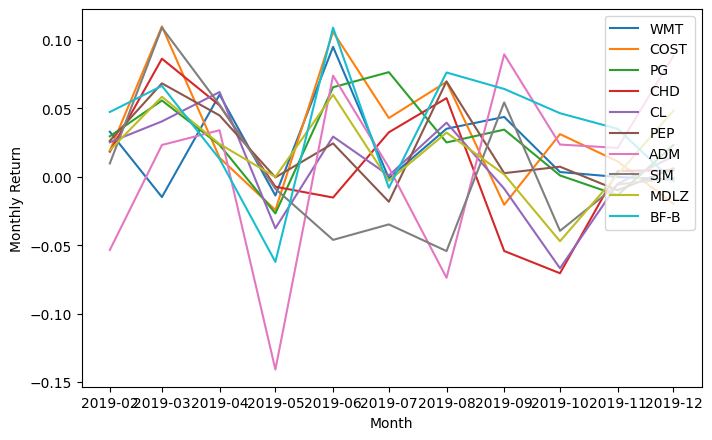

In [95]:
# We are plotting the monthly returns for our stocks:
plt.figure(figsize=(8,5), dpi =100)
sns.lineplot(data = stockm, dashes=False)
plt.legend( loc = 'upper right')
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.show() # Prints the plot

In [96]:
# We are creating the average of each stock.
# These are the objective function coefficients
stockm_return = stockm.mean()
print('Average Return:')
print (stockm_return)
print('\n') # return/blank line
# We are creating covariance table on stock return dataframe:
stockm_cov = stockm.cov()
print('Covariance Matrix:')
print(stockm_cov) # We are printing the average stock returns

Average Return:
WMT     0.021731
COST    0.030889
PG      0.026789
CHD     0.009945
CL      0.008617
PEP     0.020164
ADM     0.008457
SJM     0.003304
MDLZ    0.017847
BF-B    0.034978
dtype: float64


Covariance Matrix:
           WMT      COST        PG  ...       SJM      MDLZ      BF-B
WMT   0.001211  0.000452  0.000402  ... -0.000279  0.000360  0.000988
COST  0.000452  0.002255  0.000928  ... -0.000052  0.000712  0.001513
PG    0.000402  0.000928  0.001005  ...  0.000172  0.000478  0.000694
CHD  -0.000188  0.001002  0.000491  ...  0.000830  0.000903 -0.000023
CL    0.000596  0.000744  0.000597  ...  0.000659  0.000955  0.000605
PEP   0.000267  0.000841  0.000205  ...  0.000497  0.000534  0.000694
ADM   0.000808  0.000298  0.001018  ...  0.000884  0.000488  0.001464
SJM  -0.000279 -0.000052  0.000172  ...  0.002553  0.000468  0.000026
MDLZ  0.000360  0.000712  0.000478  ...  0.000468  0.001008  0.000512
BF-B  0.000988  0.001513  0.000694  ...  0.000026  0.000512  0.002254

[10 row

In [97]:
# We are declaring our concrete model:
model = ConcreteModel()

# We are declaring our variables - list of stocks:
model.variables =  Var(tickers_list,within=NonNegativeReals, bounds=(0,1))

# We are setting the objective expression:
obj_expr = 0
for ticker in tickers_list:
  obj_expr += stockm_return[ticker]*model.variables[ticker]

model.objective = Objective(expr = obj_expr, sense=maximize)

# We are specifying the constraints:
sum_proportions = 0
for ticker in tickers_list:
    sum_proportions += model.variables[ticker]

model.sum_proportions = Constraint(expr = sum_proportions == 1)

# model.return_floor = Constraint(expr = model.objective >= 0.015)

model.pprint() # We are printing the model

1 Set Declarations
    variables_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {'WMT', 'COST', 'PG', 'CHD', 'CL', 'PEP', 'ADM', 'SJM', 'MDLZ', 'BF-B'}

1 Var Declarations
    variables : Size=10, Index=variables_index
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
         ADM :     0 :  None :     1 : False :  True : NonNegativeReals
        BF-B :     0 :  None :     1 : False :  True : NonNegativeReals
         CHD :     0 :  None :     1 : False :  True : NonNegativeReals
          CL :     0 :  None :     1 : False :  True : NonNegativeReals
        COST :     0 :  None :     1 : False :  True : NonNegativeReals
        MDLZ :     0 :  None :     1 : False :  True : NonNegativeReals
         PEP :     0 :  None :     1 : False :  True : NonNegativeReals
          PG :     0 :  None :     1 : False :  True : NonNegativeReals
         SJM :     0 :  None :     1 : False :  True : Non

In [98]:
# We are creating calculations table for our risks:
def calc_riskm():
   # This is a list of all of investment allocations, which are proportions invested in each stock.
  proportions =  [model.variables[ticker] for ticker in tickers_list]
  riskm_matrix = [] # This is an empty list initially
  
  # We iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # Since there are 10 stocks, there are 10*10 = 100 elements, and summing these elements at the end is our risk
  for index, col in enumerate(stockm_cov.columns):
    i = 0
    riskm = []
    for row in stockm_cov[col]:
      riskm.append(proportions[index]*row*proportions[i])
      i = i + 1
    riskm_matrix.append(riskm)
  riskm_matrix = pd.DataFrame(riskm_matrix)
  return riskm_matrix.sum().sum() 

riskm_limits = np.arange(0.0001, 0.00525, 0.00025) # New risk level since it is monthly data now
riskm_limits

array([0.0001 , 0.00035, 0.0006 , 0.00085, 0.0011 , 0.00135, 0.0016 ,
       0.00185, 0.0021 , 0.00235, 0.0026 , 0.00285, 0.0031 , 0.00335,
       0.0036 , 0.00385, 0.0041 , 0.00435, 0.0046 , 0.00485, 0.0051 ])

In [99]:
# We are updating risk contraints for each limit and then we are solving the problem
param_analysism= {} # key=risk, value =stock allocations 
returnsm = {} # key=risk, value = return

for r in riskm_limits:
  model.total_riskm = Constraint(expr = calc_riskm() <= r)
  # We are running the solver:
  resultm = SolverFactory('ipopt', executable=ipopt_executable).solve(model).write()
   # We are storing our allocation proportions:
  param_analysism[r] = [model.variables[ticker]() for ticker in tickers_list]
  print( param_analysism[r])
  # We are storing our returns:
  returnsm[r] = sum([model.variables[ticker]() * stockm_return[ticker] for ticker in tickers_list])
  print("objective : ", model.objective())


    model=unknown;
        message from solver=Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03717160224914551
# --------------------------

### Appendix.1 Optimal Stock Allocation

{0.0001: [0.25919945405538136, 0.0, 0.27396064739386167, 2.1735840725129374e-08, 0.0, 0.30536476301503285, 0.0, 0.13264273675881266, 0.028832401199775613, 0.0], 0.00035: [0.25919946233071867, 0.0, 0.2739606218918361, 4.968692421793663e-08, 0.0, 0.3053647342996307, 6.009220741490255e-09, 0.1326427325885107, 0.028832408419277675, 0.0], 0.0006000000000000001: [0.12361375269813916, 5.073885304788277e-07, 0.47183389183280927, 2.2546403730821696e-07, 1.3068769197289336e-07, 0.3112330455906837, 1.3335903535174443e-07, 3.4706802262096056e-07, 9.044280565760759e-07, 0.09331706148299343], 0.0008500000000000001: [6.564338476835129e-06, 1.0188052675084402e-06, 0.5329395156386068, 2.7442510426546894e-07, 1.5868671977100429e-07, 0.1607108672295224, 1.049922541846806e-07, 2.2029553749022979e-07, 8.246266169379613e-07, 0.30634045096189394], 0.0011: [4.3289898038732543e-07, 9.535791025655813e-07, 0.54521700108555, 1.0862392842595149e-07, 5.404252056520457e-08, 0.00464867972621363, 2.832352729621875e-08

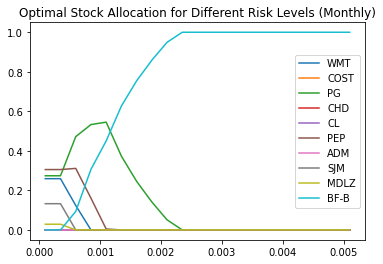

In [100]:
# For each risk limit, we are generating the dataframe for proportions of the portfolio:
print(param_analysism)
param_analysism = pd.DataFrame.from_dict(param_analysism, orient='index')
param_analysism.columns = tickers_list
print(param_analysism)
param_analysism.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels (Monthly)')
plt.show() # We are plotting the optimal allocation for different risk levels

- We can see that on the left-hand side, we have lower risk and higher diversity.
- On the right-hand side, we have higher risk but lower diversity.
- At 0.002 of risk we are investing in Walmart, Colgate, Pepsi.

In [101]:
returnsm # We are printing the returns for monthly data

{0.0001: 0.020081851316554027,
 0.00035: 0.020081850678057525,
 0.0006000000000000001: 0.024865816774496823,
 0.0008500000000000001: 0.02823267616639931,
 0.0011: 0.030444143860242037,
 0.00135: 0.03192074177038534,
 0.0016: 0.03296432624699673,
 0.00185: 0.033818942243448606,
 0.0021: 0.03456064842128922,
 0.00235: 0.03497813094249453,
 0.0026: 0.03497813086408262,
 0.0028499999999999997: 0.0349781308688632,
 0.0031: 0.03497813086796627,
 0.00335: 0.034978130865356574,
 0.0036: 0.034978130864412996,
 0.0038499999999999997: 0.03497813086390254,
 0.0041: 0.034978130863571696,
 0.004350000000000001: 0.03497813086333873,
 0.004600000000000001: 0.03497813086316519,
 0.00485: 0.03497813086303042,
 0.0051: 0.034978130862922355}

### Appendix.2 Efficient Frontier
This time the Efficient Frontier will be run for the monthly returns.

In [102]:
riskm = list(returnsm.keys()) # This forces dict_keys into a list
print(riskm)
rewardm = list(returnsm.values()) # This forces dict_values into a list
print(rewardm) # Since we cannot name our value 'return'(reserved name), we are calling it a reward

[0.0001, 0.00035, 0.0006000000000000001, 0.0008500000000000001, 0.0011, 0.00135, 0.0016, 0.00185, 0.0021, 0.00235, 0.0026, 0.0028499999999999997, 0.0031, 0.00335, 0.0036, 0.0038499999999999997, 0.0041, 0.004350000000000001, 0.004600000000000001, 0.00485, 0.0051]
[0.020081851316554027, 0.020081850678057525, 0.024865816774496823, 0.02823267616639931, 0.030444143860242037, 0.03192074177038534, 0.03296432624699673, 0.033818942243448606, 0.03456064842128922, 0.03497813094249453, 0.03497813086408262, 0.0349781308688632, 0.03497813086796627, 0.034978130865356574, 0.034978130864412996, 0.03497813086390254, 0.034978130863571696, 0.03497813086333873, 0.03497813086316519, 0.03497813086303042, 0.034978130862922355]


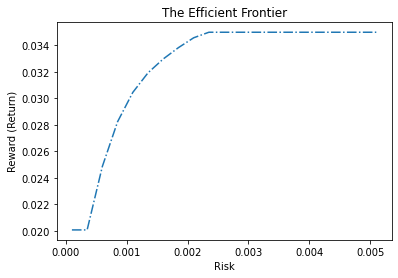

In [103]:
# We are using pylab library to plot our Efficient Frontier
from pylab import *
plot(riskm, rewardm, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show() # We are showing the Efficient Frontier chart

In [104]:
# We are using plotly to show the optimized risk:
fig = go.Figure() 
fig.add_traces(go.Scatter(x = riskm,y = rewardm,hovertext=rewardm,mode = 'lines',line=dict(color='light blue', width=4,dash='dashdot')))
 # Now you can see risk and return values, if you hover over the line:
fig.update_xaxes(title_text='Risk (Monthly)')
fig.update_yaxes(title_text='Return (Monthly)')
fig.update_layout(title='The Efficient Frontier',
                  font=dict(family="Arial, monospace",size=18,color='brown'))
fig.show()
# r=0.00235 for highest return!

Looking at the Efficient Frontier, it looks like if we choose the risk 0.00235 the allocation will be the most optimized one. However, after talking to professor, we learned that monthly model will lose accuracy and thus we will be using the risk level 0.000175 from our daily model for our analysis and portfolio returns.

# **References**

[1] https://tradingsim.com/blog/relative-strength-index/ 

[2] https://www.getsmarteraboutmoney.ca/invest/investment-products/stocks/6-indicators-used-to-assess-stocks/

[3] https://thebusinessprofessor.com/lesson/weighted-alpha-definition/

[4] https://www.investopedia.com/terms/a/averagedailytradingvolume.asp

[5] https://nfpahub.com/news/determining-growthdecline-trends-using-year-date-percent-change/